
# 4.1.1 — Introduction au Calcul Stochastique

## 🎯 Objectifs pédagogiques
À la fin de ce notebook, vous serez capable de :
- Comprendre **pourquoi** le calcul stochastique est central en finance quantitative.
- Définir et caractériser un **mouvement brownien**.
- Simuler un mouvement brownien en Python.
- Faire le lien entre un processus stochastique et les **marchés de taux**.

---

## 1. Pourquoi le calcul stochastique en finance ?

En finance, les prix évoluent de manière **aléatoire** et **continue**.  
Les modèles déterministes (comme une simple droite de tendance) ne capturent pas :
- La **variabilité** imprévisible des marchés.
- Les **sauts** et **micro-fluctuations** observés en haute fréquence.

Pour modéliser ces phénomènes, on utilise des **processus stochastiques**, qui combinent :
- **Un terme déterministe** : tendance (drift)
- **Un terme aléatoire** : bruit (diffusion)

Le calcul stochastique, et en particulier **l’intégrale d’Itô**, permet de manipuler ces processus et de résoudre des équations différentielles stochastiques (EDS).

---

## 2. Mouvement brownien : définition

Un mouvement brownien standard $W_t$ est un processus stochastique vérifiant :
1. $W_0 = 0$
2. Incréments indépendants : $W_{t+s} - W_t$ est indépendant du passé.
3. Incréments stationnaires : $W_{t+s} - W_t \sim \mathcal{N}(0, s)$.
4. Trajectoires continues (presque sûrement).

---

## 3. Propriétés importantes
- **Croissance en racine du temps** : l’écart-type de $W_t$ est $\sqrt{t}$.
- **Martingale** : $\mathbb{E}[W_t \,|\, \text{passé}] = W_s$ pour tout $s < t$.
- **Variation quadratique** : $[W]_t = t$.

Ces propriétés en font la brique de base des modèles financiers comme **Black-Scholes**, **Vasicek**, **CIR**, etc.

---


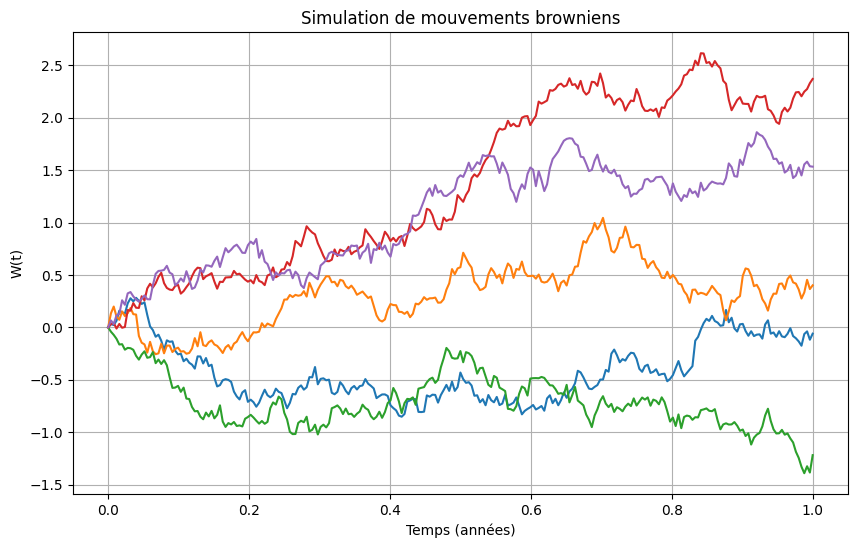

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
T = 1.0       # horizon (1 an)
N = 252       # nombre de pas (jours de bourse)
dt = T / N    # taille d'un pas
n_paths = 5   # nombre de trajectoires simulées

# Simulation : somme cumulée de N(0, dt)
np.random.seed(42)
increments = np.random.normal(loc=0, scale=np.sqrt(dt), size=(n_paths, N))
W = np.cumsum(increments, axis=1)
W = np.hstack((np.zeros((n_paths, 1)), W))  # W_0 = 0

# Affichage
plt.figure(figsize=(10,6))
for i in range(n_paths):
    plt.plot(np.linspace(0, T, N+1), W[i])
plt.title("Simulation de mouvements browniens")
plt.xlabel("Temps (années)")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()



## 4. Comparaison avec un processus déterministe

Un processus **déterministe** (exemple : $X_t = \mu t$) est entièrement prévisible.  
Un mouvement brownien, lui, est imprévisible : chaque trajectoire est différente, même si les **statistiques globales** sont connues.

**Lien avec les marchés de taux :**
- Le mouvement brownien est utilisé pour modéliser l’incertitude sur l’évolution future des taux.
- Par exemple, dans le modèle **Vasicek**, le taux instantané $r_t$ suit une EDS contenant un terme brownien.

---

## 📌 À retenir
- Le mouvement brownien est **le bloc fondamental** de la modélisation stochastique.
- En finance, il permet de capturer l’incertitude et la variabilité des prix/taux.
- Prochaine étape : **Formule d’Itô** et **Équations Différentielles Stochastiques**.

---
